In [13]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from os import path
import pandas as pd
from statsmodels.tsa.stattools import adfuller


In [14]:
features = [
    "m_speed_stddev_480",
    "m_acceleration_stddev_480",
    "m_jerk_stddev_480",
    "m_steering_stddev_480",
    "AccelInput_stddev_480",
    "BrakeInput_stddev_480",
    "realtime steering entropy_1100",
    "realtime steering entropy_1100_stddev_480",
    "perclos",
]

target = 'oss'
TRAIN_DIR = 'dms_data/train/'
TEST_DIR = 'dms_data/test/'

train_csv = '20201126_1546_0_y_train.csv'
test_csv = train_csv.replace('train', 'test')

In [15]:
train_df = pd.read_csv(path.join(TRAIN_DIR, train_csv))
test_df = pd.read_csv(path.join(TEST_DIR, test_csv))

train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])
train_df.set_index('timestamp', inplace=True)
test_df.set_index('timestamp', inplace=True)

In [16]:
feature_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_df[features] = feature_scaler.fit_transform(train_df[features])
test_df[features] = feature_scaler.transform(test_df[features])

train_df[target] = target_scaler.fit_transform(train_df[[target]])
test_df[target] = target_scaler.transform(test_df[[target]])

/home/buntin/jupyter-env/lib64/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/buntin/jupyter-env/lib64/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/buntin/jupyter-env/lib64/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/buntin/jupyter-env/lib64/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

Test RMSE: 0.267


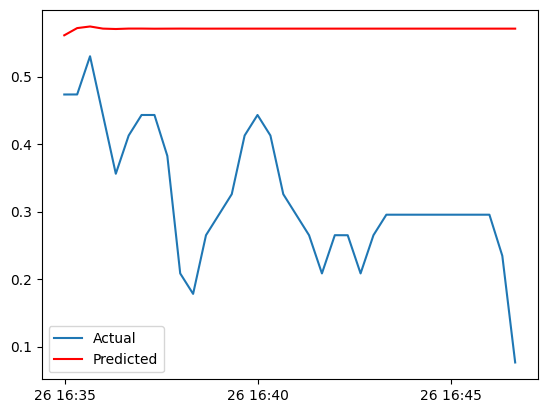

In [17]:
model = ARIMA(train_df[target], order=(5,1,0))
model_fit = model.fit()
predictions = model_fit.forecast(steps=len(test_df))


rmse = np.sqrt(mean_squared_error(test_df[target], predictions))
print('Test RMSE: %.3f' % rmse)

plt.plot(test_df.index, test_df[target], label='Actual')
plt.plot(test_df.index, predictions, label='Predicted', color='red')
plt.legend()
plt.show()

In [18]:

df = pd.read_csv(path.join(TRAIN_DIR, train_csv))
df = df.dropna()

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

columns_to_test = ['oss', 'Sleepiness']

for column in columns_to_test:
  result = adfuller(df[column])
  print(f'ADF Statistic for {column}: {result[0]}')
  print(f'p-value for {column}: {result[1]}')
  for key, value in result[4].items():
    print(f'Critical Values for {column} ({key}): {value}')
  print('\n')

ADF Statistic for oss: -4.433313855190336
p-value for oss: 0.00025902786397039013
Critical Values for oss (1%): -3.4924012594942333
Critical Values for oss (5%): -2.8886968193364835
Critical Values for oss (10%): -2.5812552709190673


ADF Statistic for Sleepiness: -1.5578896623469758
p-value for Sleepiness: 0.5047048837883671
Critical Values for Sleepiness (1%): -3.4989097606014496
Critical Values for Sleepiness (5%): -2.891516256916761
Critical Values for Sleepiness (10%): -2.5827604414827157


